In [1]:
pwd

'/Users/nicostan/Downloads/Ironhack/labs/project-I-pandas-'

In [2]:
cd Input

/Users/nicostan/Downloads/Ironhack/labs/project-I-pandas-/Input


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
df = pd.read_csv ('attacks.csv', encoding='latin')
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [4]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [ ]:
'''
Hypotheses:
#1 Top 3 countries has more shark attacks than the rest of the world combined
#2 Males beeen 15-40 are the subgroup that gets the most attacks
#3 Most countries where surf is popular are the ones that get the most shark attacks
'''

In [5]:
# Find out the percentage of missing values
print('Missing values:\n')
for i in df:
    print(i, round(df[i].isnull().sum()/df[i].shape[0]*100, 2))

Missing values:

Case Number 66.17
Date 75.5
Year 75.51
Type 75.52
Country 75.69
Area 77.27
Location 77.6
Activity 77.62
Name 76.32
Sex  77.7
Age 86.51
Injury 75.61
Fatal (Y/N) 77.6
Time 88.54
Species  86.53
Investigator or Source 75.57
pdf 75.5
href formula 75.5
href 75.5
Case Number.1 75.5
Case Number.2 75.5
original order 75.47
Unnamed: 22 100.0
Unnamed: 23 99.99


In [6]:
#renaming column original order to remove useless rows
df.rename(columns = {'original order':'order'}, inplace = True)
df.rename(columns = {'Fatal (Y/N)':'Fatal'}, inplace = True)

In [7]:
# Removing spaces from the Titles
df.columns = df.columns.str.strip()

In [8]:
# Creating a sample out of the main Dataframe without missing values for original order.
# Drop empty rows for original order, main identifier.

df.drop(df[(df.order > 6303)].index, inplace=True)
df.dropna(subset='order', inplace=True)

In [9]:
#Create a new month column to check for seasonality. (Unused)
df["Month"] = df.Date.apply(lambda x: "".join(re.findall(r"[A-Za-z]{3}-",x)).replace("-",""))
df['Month'].replace([''],[np.nan], inplace=True)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,Month,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,order,Unnamed: 22,Unnamed: 23
0,Jun,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,Jun,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,Jun,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,Jun,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,Jun,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [10]:
# drop the columns with most missing data and unnecessary reference data
df.drop(columns=['Unnamed: 22', 'Unnamed: 23','pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'Case Number.2', 'Investigator or Source', 'Time', 'Area','Location', 'Injury', 'order', 'Name', 'Species', 'Date' ], inplace=True)

In [59]:
df.head()

,Month,Year,Type,Country,Activity,Sex,Age,Fatal
0,Jun,2018.0,Boating,USA,NaN,F,55,N
1,Jun,2018.0,Unprovoked,USA,standing,F,10,N
2,Jun,2018.0,Invalid,USA,surf,M,50,N
3,Jun,2018.0,Unprovoked,AUSTRALIA,surf,M,0,N
4,Jun,2018.0,Provoked,MEXICO,diving,M,0,N


In [12]:
#Turning years into integers (we need to replace nan values by zeros first)
#Method 1: df["Year"] = df['Year'].dropna().apply(lambda x: int(x))
#df['Year'] = df['Year'].fillna(0)
# df["Year"] = pd.to_numeric(df["Year"], downcast='integer')
df['Year'].replace([0],[np.nan], inplace=True)
# Useless because if we try to reconvert the '0's into NaN, we get the int back to floats.

,Date,Year,Type,Country,Activity,Sex,Age,Fatal,Month
0,25-Jun-2018,2018.0,Boating,USA,Paddling,F,57,N,Jun
1,18-Jun-2018,2018.0,Unprovoked,USA,Standing,F,11,N,Jun
2,09-Jun-2018,2018.0,Invalid,USA,Surfing,M,48,N,Jun
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,Jun
4,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,M,NaN,N,Jun


In [13]:
#Grouping values column by column.
df['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [32]:
def types_(x):
    x.replace(['Questionable'],['Invalid'], inplace=True)
    x.replace(['Boat'],['Boating'], inplace=True)
    x.replace(['Boatomg'],['Boating'], inplace=True)
    return x
df['Type']=types_(df['Type'])
df['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          549
Boating          341
Sea Disaster     239
Name: Type, dtype: int64

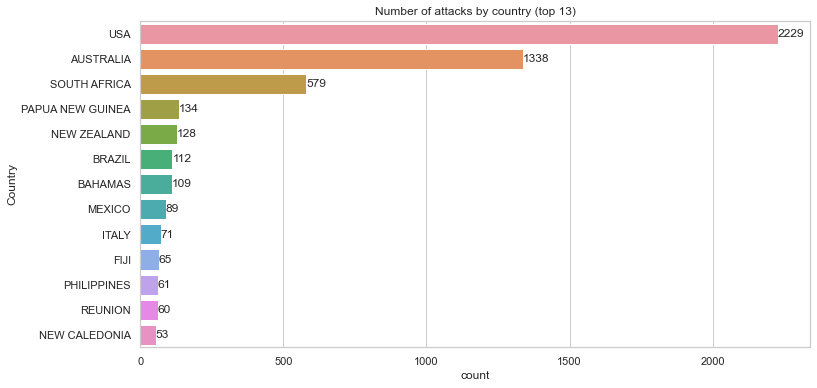

In [15]:
#Change all elements in 'Country' into uppercase
df['Country'] = df['Country'].str.upper()
#Showing countries top 13 where there have been more than 50 attacks.
ax = sns.countplot(y='Country',data=df, order=df['Country'].value_counts(ascending=False).index[:13])
#Labeling counts except for zero values.
try: 
    ax.bar_label(container=ax.containers[0], labels=df['Country'].value_counts(ascending=False).values)
except AttributeError:
    pass
ax.set_title(label='Number of attacks by country (top 13)')
plt.savefig('/Users/nicostan/Downloads/Ironhack/labs/project-I-pandas-/Images/Most attacked countries.png')

In [90]:
country_df = df[(df["Country"] =="USA") | 
                 (df["Country"] =="AUSTRALIA") |
                 (df["Country"] =="PAPUA NEW GUINEA") |
                 (df["Country"] =="NEW ZEALAND") |
                 (df["Country"] =="BRAZIL") |
                 (df["Country"] =="BAHAMAS") |
                 (df["Country"] =="MEXICO") |
                 (df["Country"] =="ITALY") |
                 (df["Country"] =="FIJI") |
                 (df["Country"] =="BRAZIL") |
                 (df["Country"] =="PHILIPPINES") |
                 (df["Country"] =="REUNION") |
                 (df["Country"] =="NEW CALEDONIA") ]

In [17]:
print('Missing values:\n')
for i in df:
    print(i, round(df[i].isnull().sum()/df[i].shape[0]*100, 2))

Missing values:

Month 8.9
Year 2.02
Type 0.06
Country 0.79
Activity 8.63
Sex 8.97
Age 44.92
Fatal 8.55


In [36]:
#Standardizing and correcting the information on Sex. 'U' is Unkown
def sex (x):
    x = x.fillna('U')
    x= x.str.strip()
    x = x.apply(lambda x: 'U' if x!='M' and x!='F' else x)
    x.replace(['U'],[np.nan], inplace=True)
    return x
df['Sex']=sex(df['Sex'])
df['Sex'].value_counts()

M    5096
F     637
Name: Sex, dtype: int64

In [57]:
df['Age'] = df['Age'].fillna(0)
def age (x):
    if re.match("\d\d?", str(x)):
        x= re.match("\d\d?", str(x))[0]
    else:
        x=str(x)
    if re.match("^\d\d?$", str(x)):
        return 5*round(int(re.findall("^\d\d?$", str(x))[0])/5)
    else:
        return np.nan
df["Age"] = df["Age"].apply(age)
df["Age"].value_counts()[:20]


0     2875
20     684
15     631
25     459
30     368
35     255
10     236
40     221
45     163
50     147
55      79
60      65
5       52
70      27
65      23
75      10
80       4
85       3
Name: Age, dtype: int64

In [20]:
 # 'Fatal (Y/N)' strip spaces left and right, convert all into uppercase, change column name to 'Fatal' and drop 'Fatal (Y/N)'
df['Fatal'] = df['Fatal'].str.strip().str.upper()
df['Fatal'] = df['Fatal'].apply(lambda x: np.nan if x!='Y' and x!='N' else x)
df['Fatal'].value_counts()

N    4301
Y    1389
Name: Fatal, dtype: int64

In [21]:
#Groups Activities together
def activities(string):
    #lowercase for functions and Title for Classes
    """Cleans the strings of text and converts it to useful simplifications"""
    string = str(string).lower().strip()
    if string != string:
        return np.nan
    elif "swimming" in string or"bathing" in string or "floating" in string or "splashing" in string or "jumped into the water" in string or "playing" in string or "escaping from alacatraz" in string:
        return "swimming"
    elif "diving" in string or "snorkel" in string:
        return "diving"
    elif "fishing" in string or "seine netting" in string or "spearing fish" in string:
        return "fishing"
    elif "surf" in string or "body boarding" in string or "body-boarding" in string or "boogie boarding" in string or "paddleskiing" in string:
        return "surf"
    elif "standing" in string:
        return "standing"
    elif "kayaking" in string or "ship" in string or "sail" in string or "boat" in string or "canoeing" in string or "board" in string or "rowing" in string or "fell into the water" in string:
        return "boating"
    elif "disaster" in string:
        return "sea disaster"
    elif "wading" in string or "walking" in string or "treading water" in string:
        return "walking"
    else:
        return np.nan
df["Activity"] = df["Activity"].apply(activities)

df["Activity"].value_counts()

swimming        1401
surf            1307
fishing         1124
diving           667
boating          394
walking          214
standing         128
sea disaster      29
Name: Activity, dtype: int64

In [22]:
df

,Month,Year,Type,Country,Activity,Sex,Age,Fatal
0,Jun,2018.0,Boating,USA,NaN,F,57,N
1,Jun,2018.0,Unprovoked,USA,standing,F,11,N
2,Jun,2018.0,Invalid,USA,surf,M,48,N
3,Jun,2018.0,Unprovoked,AUSTRALIA,surf,M,NaN,N
4,Jun,2018.0,Provoked,MEXICO,diving,M,NaN,N
...,...,...,...,...,...,...,...,...
6297,NaN,NaN,Unprovoked,AUSTRALIA,diving,M,NaN,Y
6298,NaN,NaN,Unprovoked,AUSTRALIA,diving,M,NaN,Y
6299,NaN,NaN,Unprovoked,USA,swimming,M,NaN,Y
6300,NaN,NaN,Unprovoked,PANAMA,NaN,M,NaN,Y


In [23]:
# Find out the percentage of missing values
print('Missing values:\n')
for i in df:
    print(i, round(df[i].isnull().sum()/df[i].shape[0]*100, 2))

Missing values:

Month 8.9
Year 2.02
Type 0.06
Country 0.79
Activity 16.47
Sex 9.03
Age 45.56
Fatal 9.71


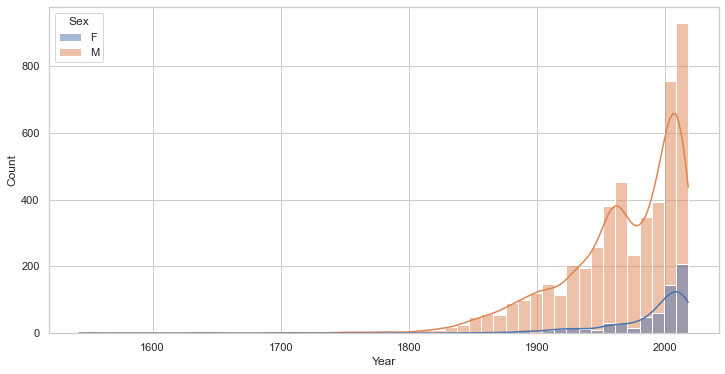

In [44]:
#Only consider year values after 1500
'''The histogram shows that each decade, the total number of shark attacks has increased systematically,
especially clear in Male population. The only "drop" in shark attacks are in the early and mid 1900, which
can be attributed to the first and second World War.
This can be interpeted as sea-related activities gained popularity, more people get attacked by sharks.
'''
ax2 = sns.histplot(data=df, x=df[df['Year']>1500].Year, hue="Sex", bins=50, kde=True);
plt.savefig('/Users/nicostan/Downloads/Ironhack/labs/project-I-pandas-/Images/incidents_bysex_sharkattack.png')

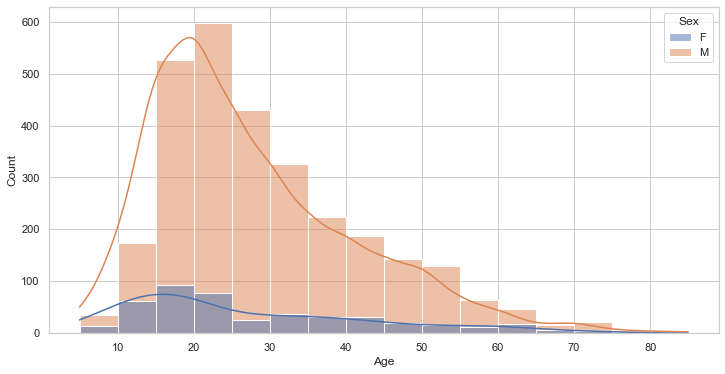

In [58]:
'''Now we can check to see if the hypothesis 1: Males between 20 and 40 are the most susceptible to shark attacks
is true. We will do this by checking the Age separated by Sex of the Shark Attacks.
Notice that the 0 values are ommitted since they were not real and that ages are grouped by intervals of 5.
'''
ax3 = sns.histplot(data=df, x=df[df['Age']>0].Age, hue="Sex", bins=16, kde=True);

plt.savefig('/Users/nicostan/Downloads/Ironhack/labs/project-I-pandas-/Images/incidents_byage.png')

In [ ]:
'''
The hypothesis 2 proves to be true. Males between 15 and 40 are the most susceptible to get attacked by sharks
'''

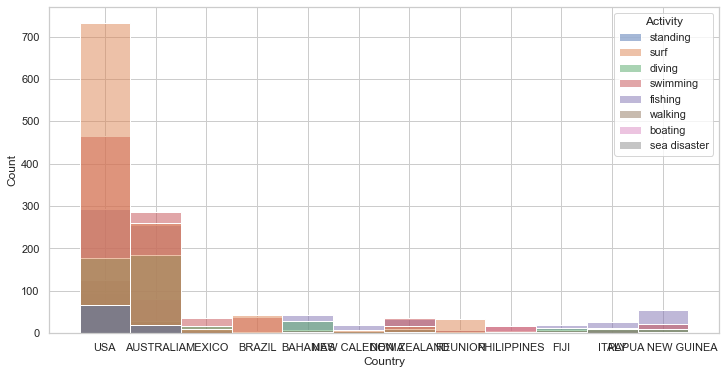

In [98]:
'''
For the last hypothesis we want to see how much surfing there is per country and then compare that to shark attacks by activity.
'''
ax4 = sns.histplot(data=country_df, x='Country', hue="Activity", bins=13);
plt.savefig('/Users/nicostan/Downloads/Ironhack/labs/project-I-pandas-/Images/Activities by Country.png')



In [99]:
df["Activity"].value_counts()
'''
This third hypothesis turns out to be false as the most 'dangerous' activity is swimming
and in countries like Australia the most common way of getting attacjed by sharks is walking.
'''

swimming        1401
surf            1307
fishing         1124
diving           667
boating          394
walking          214
standing         128
sea disaster      29
Name: Activity, dtype: int64